In [1]:
from customs.pipes.control_img2img_pipe import ControlNet_img2img_Pipe
import customs.custom_api as custom_api
import torch
from transformers import CLIPTextModel, CLIPTokenizer


pretrained_model_name_or_path = "/workspace/ControlNet_jh/customs/models/diffusers/canny_razaras-superschool-1200"


# load tokenizer
tokenizer = CLIPTokenizer.from_pretrained(
    pretrained_model_name_or_path,
    subfolder="tokenizer",
)
text_encoder = CLIPTextModel.from_pretrained(
    pretrained_model_name_or_path, 
    subfolder="text_encoder", 
    torch_dtype=torch.float16
)

# add tokens
embed_path = '/workspace/ControlNet_jh/ControlNet/embeddings'
embed_list = ['goddess','razaras-v15','superschool']
custom_api.add_token(embed_path=embed_path,tokens=embed_list,tokenizer=tokenizer,text_encoder=text_encoder)

# load controlNet img2img model
pipe = ControlNet_img2img_Pipe.from_pretrained(
    "/workspace/ControlNet_jh/customs/models/diffusers/canny_razaras-superschool-1200",
    text_encoder=text_encoder,
    tokenizer=tokenizer
    ).to("cuda")

/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


goddess added to CLIP tokenizer
razaras-v15 added to CLIP tokenizer
superschool added to CLIP tokenizer


/usr/local/lib/python3.8/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


100%|██████████| 35/35 [00:05<00:00,  6.36it/s]


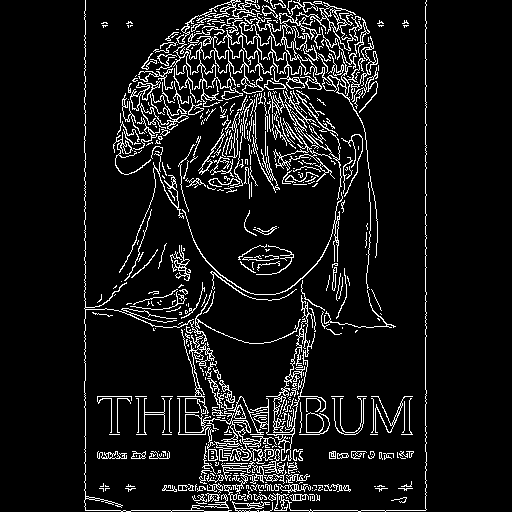

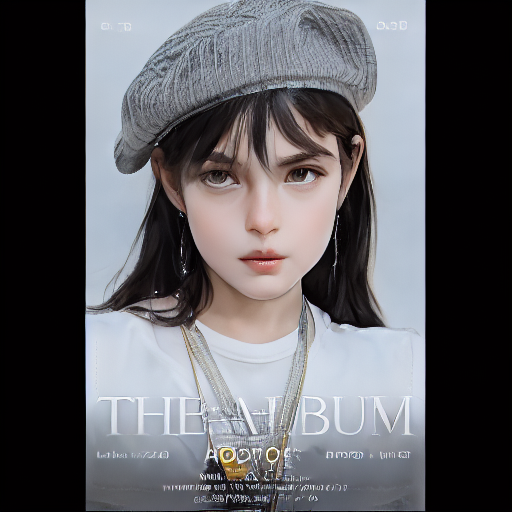

In [3]:
from PIL import Image
import numpy as np
from ControlNet.annotator.canny import CannyDetector
from ControlNet.annotator.util import resize_image, HWC3

# load init image
image = Image.open('/workspace/ControlNet_jh/customs/test_images/PS20092300066.jpg')

# image preprocess
image = custom_api.resize_padding(image)
image = np.asanyarray(image)
image = resize_image(HWC3(image), 512)

# detect canny
canny_detector = CannyDetector()
detected_map = canny_detector(image, 100, 200)

# inputs to PIL Image
detected_map = Image.fromarray(detected_map)
image = Image.fromarray(image)

# inference
custom_api.seed_everything()
image_out = pipe(
    prompt="razaras-v15 superschool woman, \
        8k, uhd, high quality, masterpiece, in superschool style and razaras style ((trending on artstation and pinterest)), detailed face, dynamic pose", 
    negative_prompt='nsfw, bad quality, letters, characters, writings, chinese chracters, watermark, username, artist name, fewer digits, \
        clevage, bad hands, chinese clothes, blurry, ((bad anatomy)), (((bad proportions))), ((extra limbs)), cloned face, (((disfigured))), \
        extra limbs, (bad anatomy), gross proportions, (too many fingers), (((long neck))), Photoshop, video game, tiling, poorly drawn hands,\
        poorly drawn feet, poorly drawn face, mutated, extra limbs, extra legs, extra arms, disfigured, deformed, cross-eye, body out of frame, \
        blurry, bad anatomy, 3d render, too many pople',
    image = image,
    controlnet_hint=detected_map,
    strength=0.7,
    num_inference_steps=50,
    guidance_scale=7.5
    ).images[0]

detected_map.show()
image_out.show()